In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.use('TkAgg')

from sklearn import cluster

C:\Users\Muhammad\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "C:\Users\Muhammad\Anaconda3\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\Muhammad\Anaconda3\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\Muhammad\Anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\Muhammad\Anaconda3\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "C:\Users\Muhammad\Anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 477, in start
    ioloop.IOLoop.instance().st

In [2]:
csv_data = pd.read_csv("h1b_kaggle.csv")
df = pd.DataFrame(csv_data)
df = df.dropna()
df = df.drop('Unnamed: 0', 1)
df.YEAR = df.YEAR.astype(int)
df['STATE'] = df.WORKSITE.apply(lambda x: x.split(', ')[1])

In [12]:
d_eng = df[['YEAR','JOB_TITLE']]
d_eng = d_eng.set_index('YEAR')
d_eng = d_eng[d_eng.JOB_TITLE == 'DATA ENGINEER']
d_eng = d_eng.groupby('YEAR').count()
d_eng.columns = ['DATA ENGINEERS']
d_eng.plot()

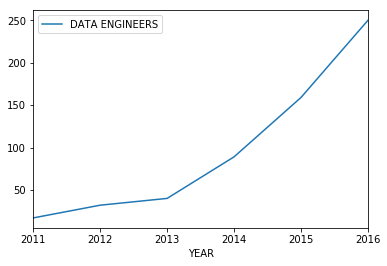

In [13]:
plt.show()

In [22]:
h_eng = df[['STATE','JOB_TITLE']]
h_eng = h_eng.set_index('STATE')
h_eng = h_eng[h_eng.JOB_TITLE == 'HARDWARE ENGINEER']
h_eng = h_eng.groupby('STATE').count().sort_values('JOB_TITLE',ascending=0)[:5]
h_eng.columns = ['HARDWARE ENGINEERS']
h_eng.plot(kind='Barh')

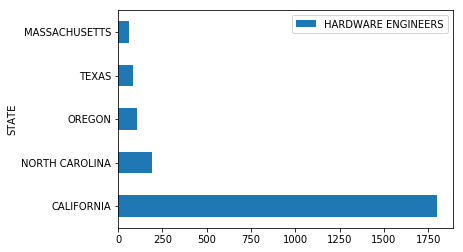

In [23]:
plt.show()

In [107]:
emp = df[['YEAR','EMPLOYER_NAME']]
emp = emp.set_index('EMPLOYER_NAME')
emp['COUNT'] = 1
emp = emp.groupby(['EMPLOYER_NAME','YEAR']).sum()
emp = emp.sort_values('COUNT',ascending=False)
#emp = emp.sort_values('EMPLOYER_NAME',ascending=True)#.sort_values('YEAR',ascending=False)
#emp = emp[emp.COUNT > 8000]
#emp.plot(y='COUNT',subplots=True, kind='barh')

In [4]:
#plt.show()
#emp

In [24]:
d_sci = df[['SOC_NAME','JOB_TITLE']]
d_sci = d_sci[d_sci.JOB_TITLE == 'DATA SCIENTIST']
d_sci = d_sci.groupby('SOC_NAME').count().sort_values('JOB_TITLE',ascending=False)[:5]
d_sci.columns = ['DATA SCIENTIST']
d_sci.plot(kind='Barh')

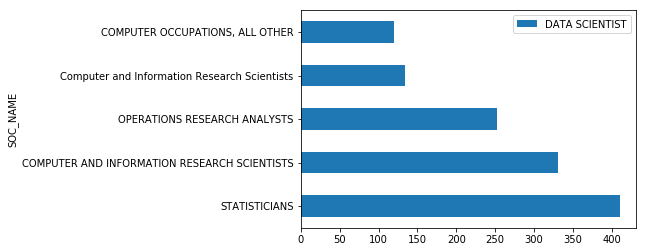

In [25]:
plt.show()

In [72]:
f_time = df[['FULL_TIME_POSITION']]
f_time['COUNT'] = 1
f_time = f_time.groupby('FULL_TIME_POSITION').count()
#d_eng.columns = ['DATA ENGINEERS']
f_time.plot(kind='pie', subplots=True, explode=[0.1,0.1], autopct='%1.1f%%')

C:\Users\Muhammad\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001FEBCF290F0>], dtype=object)

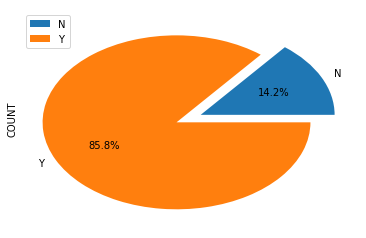

In [73]:
plt.show()

In [9]:
status = df[['YEAR','CASE_STATUS']]
status = status.set_index('CASE_STATUS')
status['COUNT'] = 1
status = status.groupby(['CASE_STATUS','YEAR']).sum()
status = status.unstack().dropna()
status.plot(kind='bar')

In [ ]:
plt.show()
#status

In [8]:
emp = df[['EMPLOYER_NAME','CASE_STATUS']]
emp = emp.set_index('CASE_STATUS')
emp['COUNT'] = 1
emp = emp.groupby(['CASE_STATUS','EMPLOYER_NAME']).sum()
#emp = emp.unstack().dropna()
emp.plot(kind='barh')
#emp

KeyboardInterrupt: 